<a href="https://colab.research.google.com/github/Kirtanx07/CyberAI_IDS/blob/main/01_Data_Exploration_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

# Show first few rows
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
# Remove leading/trailing spaces from all column names
df_test.columns = df_test.columns.str.strip()

# Now you can access 'Label' normally
print(df_test['Label'].value_counts())




Label
PortScan    158930
BENIGN      127537
Name: count, dtype: int64


In [9]:
df.columns = df.columns.str.strip()

df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


In [10]:
X = df.drop(['Label'], axis=1)
y = df['Label']

# Some columns might be strings, remove them
X = X.select_dtypes(include=['float64', 'int64'])


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
X = df.drop('Label', axis=1)  # All columns except the target
y = df['Label']               # Target column


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [20]:
print(X_train.shape)
print(y_train.shape)


(200516, 78)
(200516,)


In [21]:
print(X_train.dtypes.value_counts())




int64      54
float64    24
Name: count, dtype: int64


In [24]:
# Clean NaN and infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)


In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


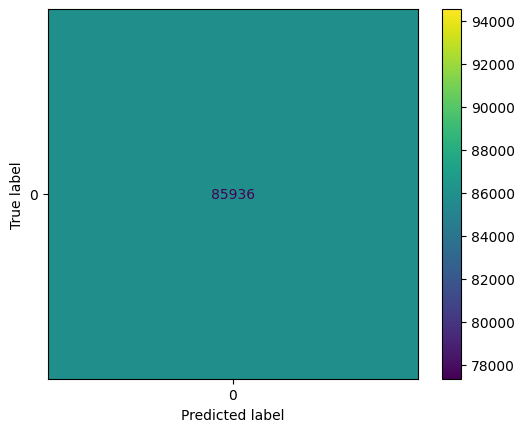

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     85936

    accuracy                           1.00     85936
   macro avg       1.00      1.00      1.00     85936
weighted avg       1.00      1.00      1.00     85936



In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     85936

    accuracy                           1.00     85936
   macro avg       1.00      1.00      1.00     85936
weighted avg       1.00      1.00      1.00     85936



In [31]:
import joblib

joblib.dump(model, 'cyberAI_ids_model.pkl')


['cyberAI_ids_model.pkl']

In [23]:
import numpy as np
